# Imports

In [1]:
%matplotlib inline

In [121]:
import pandas as pd
from pathlib import Path
import seaborn as sns

# Constants

In [3]:
icnf_file_2015 = Path('/home/dany/Dev/mp-incendios/data/raw/icnf_2015.csv')
icnf_file_2016 = Path('/home/dany/Dev/mp-incendios/data/raw/icnf_2016.csv')
icnf_file_2017 = Path('/home/dany/Dev/mp-incendios/data/raw/icnf_2017.csv')
icnf_file_2018 = Path('/home/dany/Dev/mp-incendios/data/raw/icnf_2018.csv')
icnf_file_2019 = Path('/home/dany/Dev/mp-incendios/data/raw/icnf_2019.csv')
icnf_file_2020 = Path('/home/dany/Dev/mp-incendios/data/raw/icnf_2020.csv')
icnf_file_2021 = Path('/home/dany/Dev/mp-incendios/data/raw/icnf_2021.csv')

# Reading

In [4]:
icnf_files = [pd.read_csv(i) for i in [icnf_file_2015, icnf_file_2016, icnf_file_2017, icnf_file_2018, icnf_file_2019, icnf_file_2020, icnf_file_2021]]

<ipython-input-4-818b719ab57e>:1: DtypeWarning: Columns (66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  icnf_files = [pd.read_csv(i) for i in [icnf_file_2015, icnf_file_2016, icnf_file_2017, icnf_file_2018, icnf_file_2019, icnf_file_2020, icnf_file_2021]]
<ipython-input-4-818b719ab57e>:1: DtypeWarning: Columns (66,67,69,71,72,75,76) have mixed types.Specify dtype option on import or set low_memory=False.
  icnf_files = [pd.read_csv(i) for i in [icnf_file_2015, icnf_file_2016, icnf_file_2017, icnf_file_2018, icnf_file_2019, icnf_file_2020, icnf_file_2021]]


In [5]:
[i.shape for i in icnf_files]

[(19669, 77),
 (16131, 77),
 (21074, 77),
 (12296, 77),
 (10909, 77),
 (9713, 77),
 (6996, 77)]

In [6]:
icnf_files[0].columns

Index(['Unnamed: 0', 'DISTRITO', 'TIPO', 'ANO', 'AREAPOV', 'AREAMATO',
       'AREAAGRIC', 'AREATOTAL', 'REACENDIMENTOS', 'QUEIMADA', 'FALSOALARME',
       'FOGACHO', 'INCENDIO', 'AGRICOLA', 'NCCO', 'NOMECCO', 'DATAALERTA',
       'HORAALERTA', 'LOCAL', 'CONCELHO', 'FREGUESIA', 'FONTEALERTA', 'INE',
       'X', 'Y', 'DIA', 'MES', 'HORA', 'OPERADOR', 'PERIMETRO', 'APS', 'CAUSA',
       'TIPOCAUSA', 'DHINICIO', 'DHFIM', 'DURACAO', 'HAHORA', 'DATAEXTINCAO',
       'HORAEXTINCAO', 'DATA1INTERVENCAO', 'HORA1INTERVENCAO', 'QUEIMA', 'LAT',
       'LON', 'CAUSAFAMILIA', 'TEMPERATURA', 'HUMIDADERELATIVA',
       'VENTOINTENSIDADE', 'VENTOINTENSIDADE_VETOR', 'VENTODIRECAO_VETOR',
       'PRECEPITACAO', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'DSR', 'THC',
       'MODFARSITE', 'ALTITUDEMEDIA', 'DECLIVEMEDIO', 'HORASEXPOSICAOMEDIA',
       'DENDIDADERV', 'COSN5VARIEDADE', 'AREAMANCHAMODFARSITE',
       'AREASFICHEIROS_GNR', 'AREASFICHEIROS_GTF', 'FICHEIROIMAGEM_GNR',
       'AREASFICHEIROSHP_GTF

In [7]:
np.unique([i.columns.values for i in icnf_files])

array(['AGRICOLA', 'ALTITUDEMEDIA', 'ANO', 'APS', 'AREAAGRIC',
       'AREAMANCHAMODFARSITE', 'AREAMATO', 'AREAPOV',
       'AREASFICHEIRODBF_GTF', 'AREASFICHEIROPRJ_GTF',
       'AREASFICHEIROSBN_GTF', 'AREASFICHEIROSBX_GTF',
       'AREASFICHEIROSHPXML_GTF', 'AREASFICHEIROSHP_GTF',
       'AREASFICHEIROSHX_GTF', 'AREASFICHEIROS_GNR', 'AREASFICHEIROS_GTF',
       'AREASFICHEIROZIP_SAA', 'AREATOTAL', 'BUI', 'CAUSA',
       'CAUSAFAMILIA', 'CONCELHO', 'COSN5VARIEDADE', 'DATA1INTERVENCAO',
       'DATAALERTA', 'DATAEXTINCAO', 'DC', 'DECLIVEMEDIO', 'DENDIDADERV',
       'DHFIM', 'DHINICIO', 'DIA', 'DISTRITO', 'DMC', 'DSR', 'DURACAO',
       'FALSOALARME', 'FFMC', 'FICHEIROIMAGEM_GNR', 'FOGACHO',
       'FONTEALERTA', 'FREGUESIA', 'FWI', 'HAHORA', 'HORA',
       'HORA1INTERVENCAO', 'HORAALERTA', 'HORAEXTINCAO',
       'HORASEXPOSICAOMEDIA', 'HUMIDADERELATIVA', 'INCENDIO', 'INE',
       'ISI', 'LAT', 'LOCAL', 'LON', 'MES', 'MODFARSITE', 'NCCO',
       'NOMECCO', 'OPERADOR', 'PERIMETRO', 'PR

Woah, they have all the same number and ordering of columns! That is good. 

# Inspecting relevant columns

Can we quickly merge all of them into a single DF? 

In [8]:
merged = pd.concat(icnf_files, axis=0)

In [9]:
merged.shape

(96788, 77)

In [10]:
merged.columns

Index(['Unnamed: 0', 'DISTRITO', 'TIPO', 'ANO', 'AREAPOV', 'AREAMATO',
       'AREAAGRIC', 'AREATOTAL', 'REACENDIMENTOS', 'QUEIMADA', 'FALSOALARME',
       'FOGACHO', 'INCENDIO', 'AGRICOLA', 'NCCO', 'NOMECCO', 'DATAALERTA',
       'HORAALERTA', 'LOCAL', 'CONCELHO', 'FREGUESIA', 'FONTEALERTA', 'INE',
       'X', 'Y', 'DIA', 'MES', 'HORA', 'OPERADOR', 'PERIMETRO', 'APS', 'CAUSA',
       'TIPOCAUSA', 'DHINICIO', 'DHFIM', 'DURACAO', 'HAHORA', 'DATAEXTINCAO',
       'HORAEXTINCAO', 'DATA1INTERVENCAO', 'HORA1INTERVENCAO', 'QUEIMA', 'LAT',
       'LON', 'CAUSAFAMILIA', 'TEMPERATURA', 'HUMIDADERELATIVA',
       'VENTOINTENSIDADE', 'VENTOINTENSIDADE_VETOR', 'VENTODIRECAO_VETOR',
       'PRECEPITACAO', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'DSR', 'THC',
       'MODFARSITE', 'ALTITUDEMEDIA', 'DECLIVEMEDIO', 'HORASEXPOSICAOMEDIA',
       'DENDIDADERV', 'COSN5VARIEDADE', 'AREAMANCHAMODFARSITE',
       'AREASFICHEIROS_GNR', 'AREASFICHEIROS_GTF', 'FICHEIROIMAGEM_GNR',
       'AREASFICHEIROSHP_GTF

Okay, now let's take a look at relevant columns: 

In [11]:
merged.DISTRITO.unique()

array(['Évora', 'Portalegre', 'Beja', 'Guarda', 'Castelo Branco', 'Viseu',
       'Coimbra', 'Aveiro', 'Leiria', 'Porto', 'Braga',
       'Viana do Castelo', 'Viana Do Castelo', 'Santarém', 'Lisboa',
       'Vila Real', 'Bragança', 'Setúbal', 'Faro'], dtype=object)

Seems we have no islands (which may be somewhat expected).

### Event areas

In [12]:
merged[['AREAPOV', 'AREAMATO', 'AREAAGRIC']].describe()

,AREAPOV,AREAMATO,AREAAGRIC
count,96788.000000,96788.000000,96788.000000
mean,5.363094,3.966748,0.707664
std,266.234062,99.039592,33.082430
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.010000,0.000000
75%,0.000000,0.140000,0.000000
max,47215.433221,13178.860000,5493.424200


In [13]:
merged[['AREAPOV', 'AREAMATO', 'AREAAGRIC', 'AREATOTAL']].describe()

,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL
count,96788.000000,96788.000000,96788.000000,96788.000000
mean,5.363094,3.966748,0.707664,10.037505
std,266.234062,99.039592,33.082430,353.205043
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.010000
50%,0.000000,0.010000,0.000000,0.059600
75%,0.000000,0.140000,0.000000,0.500000
max,47215.433221,13178.860000,5493.424200,53618.811555


In [14]:
merged['areatot_mine'] = merged.apply(lambda x: x.AREAPOV+x.AREAMATO+x.AREAAGRIC, axis=1)

In [15]:
(merged['areatot_mine'] - merged['AREATOTAL']).describe()

count    9.678800e+04
mean    -3.974945e-16
std      2.034877e-13
min     -4.001777e-11
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.182787e-11
dtype: float64

The difference is 0, so clearly the total area is a sum of agricultural, inhabited and forest area. 

In [16]:
merged.drop('areatot_mine', axis=1, inplace=True)

But let's take a look at the total distribution of areas. We can probaly safely discard the 5% percentile as those are relatively minor events, but do we have outliers or bugs? A fire where the total burnt area is way above than the country's area?

In [18]:
merged['AREATOTAL'].describe()

count    96788.000000
mean        10.037505
std        353.205043
min          0.000000
25%          0.010000
50%          0.059600
75%          0.500000
max      53618.811555
Name: AREATOTAL, dtype: float64

<AxesSubplot:ylabel='Frequency'>

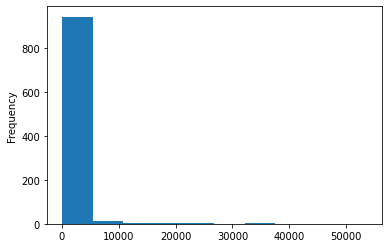

In [21]:
merged['AREATOTAL'][merged['AREATOTAL'] > merged['AREATOTAL'].quantile(.99)].plot(kind='hist')

These are probably the big forest fires of the last few years. The country's area is 9.226 $\times$ 10^6 hectares. The biggest entry in the edatabase is 53618 Ha - about 0.56% of the country. Checks out. 

In [22]:
merged['AREATOTAL'][merged['AREATOTAL'] < merged['AREATOTAL'].quantile(.05)].shape

(4211,)

In [82]:
merged['AREATOTAL'].quantile(.05)

0.001

How many forest fires have exactly 0.0 Ha?

In [87]:
merged[merged['AREATOTAL'] == 0]

,Unnamed: 0,DISTRITO,TIPO,ANO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,QUEIMADA,...,AREASFICHEIROS_GTF,FICHEIROIMAGEM_GNR,AREASFICHEIROSHP_GTF,AREASFICHEIROSHPXML_GTF,AREASFICHEIRODBF_GTF,AREASFICHEIROPRJ_GTF,AREASFICHEIROSBN_GTF,AREASFICHEIROSBX_GTF,AREASFICHEIROSHX_GTF,AREASFICHEIROZIP_SAA
2364,2364,Faro,Florestal,2015,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2978,2978,Faro,Florestal,2015,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4466,4466,Faro,Florestal,2015,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8294,8294,Faro,Florestal,2015,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10709,10709,Faro,Florestal,2015,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6681,6681,Vila Real,Florestal,2021,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6712,6712,Vila Real,Agrícola,2021,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6844,6844,Bragança,Florestal,2021,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6896,6896,Bragança,Florestal,2021,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If we exclude the 5% percentile, we exclude 4k events (including these 0 ones). **These are events with less than 0.001 Ha of burnt area - 10m². Pretty safe to exclude, I'd say. In fact, we could probably go even further.**

### Event type

In [27]:
merged['TIPO'].unique()

array(['Agrícola', 'Florestal', 'Queima'], dtype=object)

In [28]:
merged['QUEIMADA'].unique()

array([0])

I think we are interested in all three types. "Agrícola" probably refers to fires stemming from the usage of agricultural machnes; "Florestal" from naturally occurring or criminal forest fires; "Queima" from people burning trash or residues and the situation getting out of hand. **No relevant filtering whatsoever.**

### False alarms

In [31]:
merged['FALSOALARME'].describe()

count    96788.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: FALSOALARME, dtype: float64

**Filter out all false alarms (we seem to have none, but we could add the code there in any case).**

### Little fire ("fogacho")

In [33]:
merged['FOGACHO'].unique()

array([0, 1])

Is this somewhat related with the burnt area?

In [41]:
merged[(merged['FOGACHO'] == 0)]['AREATOTAL'].describe()

count    33687.000000
mean        28.588506
std        598.260891
min          0.000000
25%          0.020000
50%          0.963400
75%          2.930000
max      53618.811555
Name: AREATOTAL, dtype: float64

In [42]:
merged[(merged['FOGACHO'] == 1)]['AREATOTAL'].describe()

count    63101.000000
mean         0.133898
std          0.206710
min          0.000000
25%          0.010000
50%          0.040000
75%          0.150000
max          1.590000
Name: AREATOTAL, dtype: float64

Do we have anything, visually?

(0.0, 10.0)

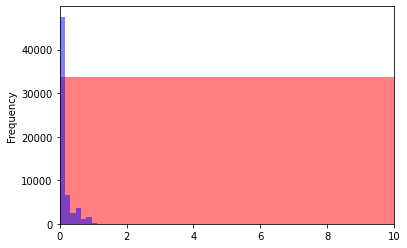

In [52]:
fig, ax = plt.subplots(1,1)
merged[(merged['FOGACHO'] == 0)]['AREATOTAL'].plot(kind='hist', ax=ax, alpha=0.5, color='r')
merged[(merged['FOGACHO'] == 1)]['AREATOTAL'].plot(kind='hist', ax=ax, alpha=0.5, color='b')
ax.set_xlim([0, 10])

Okay, it's connected with the area. We are already doing area filtering, so **no filtering needed.**

### "Incêndio" and "Agrícola" fields

In [88]:
merged['INCENDIO'].unique()

array([0, 1])

In [89]:
merged['AGRICOLA'].unique()

array([1, 0])

First of all, are all "Agricola" fires?

In [60]:
merged['INCENDIO'][merged['AGRICOLA'] == 1].unique()

array([0])

_Huh... no._

Okay, so let's take a look at the cause for all those where 'INCENDIO' is false. 

In [73]:
merged['TIPOCAUSA'][merged['INCENDIO'] == 0].unique()

array(['Negligente', 'Desconhecida', 'Intencional', 'Natural',
       'Reacendimento', nan], dtype=object)

In [74]:
merged['TIPOCAUSA'][merged['AGRICOLA'] == 0].unique()

array(['Negligente', 'Desconhecida', 'Intencional', 'Natural',
       'Reacendimento', nan], dtype=object)

Is it present throughout the years (wondering if it's a data schema artifact)?

In [75]:
merged['ANO'][merged['INCENDIO'] == 0].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [78]:
merged['ANO'][merged['AGRICOLA'] == 0].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [77]:
merged['ANO'][merged['INCENDIO'] == 1].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [79]:
merged['ANO'][merged['AGRICOLA'] == 1].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

_Hmmm, present throughout all those years. Any areas pattern?_

In [91]:
merged['AREATOTAL'][merged['INCENDIO'] == 1].describe()

count    15060.000000
mean        63.003739
std        893.357793
min          1.000000
25%          1.500000
50%          3.000000
75%          9.042500
max      53618.811555
Name: AREATOTAL, dtype: float64

In [93]:
merged['AREATOTAL'][merged['INCENDIO'] == 0].describe()

count    81728.000000
mean         0.277429
std          8.640731
min          0.000000
25%          0.010000
50%          0.037500
75%          0.169500
max       2382.000000
Name: AREATOTAL, dtype: float64

In [92]:
merged['AREATOTAL'][merged['AGRICOLA'] == 1].describe()

count    18627.000000
mean         0.763659
std         18.087325
min          0.000000
25%          0.005000
50%          0.030000
75%          0.200600
max       2382.000000
Name: AREATOTAL, dtype: float64

In [94]:
merged['AREATOTAL'][merged['AGRICOLA'] == 0].describe()

count    78161.000000
mean        12.247609
std        392.914291
min          0.000000
25%          0.010000
50%          0.075000
75%          0.500000
max      53618.811555
Name: AREATOTAL, dtype: float64

And what's the intersect like? 

In [99]:
merged[(merged['INCENDIO'] == 1) & (merged['AGRICOLA'] == 0)].describe()

,Unnamed: 0,ANO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,QUEIMADA,FALSOALARME,FOGACHO,...,ALTITUDEMEDIA,DECLIVEMEDIO,HORASEXPOSICAOMEDIA,DENDIDADERV,COSN5VARIEDADE,AREAMANCHAMODFARSITE,FICHEIROIMAGEM_GNR,AREASFICHEIROSHPXML_GTF,AREASFICHEIROSBN_GTF,AREASFICHEIROSBX_GTF
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.0,15060.0,15060.0,...,15050.000000,15050.000000,0.0,15057.000000,15057.000000,9622.000000,0.0,0.0,0.0,0.0
mean,8106.423639,2017.184197,34.300753,25.098337,3.604649,63.003739,0.077490,0.0,0.0,0.0,...,430.686536,18.377798,NaN,221.638945,16.832918,621.386593,NaN,NaN,NaN,NaN
std,5932.049298,1.842908,674.218692,250.028490,81.357842,893.357793,0.267376,0.0,0.0,0.0,...,284.152937,10.212702,NaN,183.648622,4.810556,3889.158922,NaN,NaN,NaN,NaN
min,0.000000,2015.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,...,-48.088100,0.145139,NaN,0.000000,2.030000,1.000280,NaN,NaN,NaN,NaN
25%,2618.750000,2016.000000,0.000000,0.700000,0.000000,1.500000,0.000000,0.0,0.0,0.0,...,191.615250,10.581700,NaN,107.470000,13.650000,11.382600,NaN,NaN,NaN,NaN
50%,6993.500000,2017.000000,0.500000,1.760850,0.000000,3.000000,0.000000,0.0,0.0,0.0,...,389.247000,17.090900,NaN,169.446000,16.640000,48.593200,NaN,NaN,NaN,NaN
75%,12655.500000,2018.000000,2.390000,5.000000,0.000000,9.042500,0.000000,0.0,0.0,0.0,...,641.539000,25.100200,NaN,272.113000,19.760000,242.655000,NaN,NaN,NaN,NaN
max,21073.000000,2021.000000,47215.433221,13178.860000,5493.424200,53618.811555,1.000000,0.0,0.0,0.0,...,1493.360000,65.750600,NaN,1886.040000,37.880000,80409.600000,NaN,NaN,NaN,NaN


In [100]:
merged[(merged['INCENDIO'] == 1) & (merged['AGRICOLA'] == 1)].describe()

,Unnamed: 0,ANO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,QUEIMADA,FALSOALARME,FOGACHO,...,ALTITUDEMEDIA,DECLIVEMEDIO,HORASEXPOSICAOMEDIA,DENDIDADERV,COSN5VARIEDADE,AREAMANCHAMODFARSITE,FICHEIROIMAGEM_GNR,AREASFICHEIROSHPXML_GTF,AREASFICHEIROSBN_GTF,AREASFICHEIROSBX_GTF
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
merged[(merged['INCENDIO'] == 0) & (merged['AGRICOLA'] == 0)].describe()

,Unnamed: 0,ANO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,QUEIMADA,FALSOALARME,FOGACHO,...,ALTITUDEMEDIA,DECLIVEMEDIO,HORASEXPOSICAOMEDIA,DENDIDADERV,COSN5VARIEDADE,AREAMANCHAMODFARSITE,FICHEIROIMAGEM_GNR,AREASFICHEIROSHPXML_GTF,AREASFICHEIROSBN_GTF,AREASFICHEIROSBX_GTF
count,63101.000000,63101.000000,63101.000000,63101.000000,63101.000000,63101.000000,63101.000000,63101.0,63101.0,63101.0,...,63078.00000,63078.000000,0.0,63094.000000,63095.000000,34472.000000,0.0,0.0,0.0,0.0
mean,7955.687026,2017.372989,0.039499,0.093928,0.000470,0.133898,0.085244,0.0,0.0,1.0,...,271.96922,14.482271,NaN,364.138303,18.336068,382.761637,NaN,NaN,NaN,NaN
std,4973.239146,1.846474,0.124766,0.175898,0.011247,0.206710,0.279247,0.0,0.0,0.0,...,232.11691,9.213414,NaN,282.289278,4.645045,1884.364291,NaN,NaN,NaN,NaN
min,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,-63.79250,0.116583,NaN,3.316050,1.000000,1.000280,NaN,NaN,NaN,NaN
25%,3999.000000,2016.000000,0.000000,0.001000,0.000000,0.010000,0.000000,0.0,0.0,1.0,...,92.25250,7.434630,NaN,167.426500,15.260000,7.844660,NaN,NaN,NaN,NaN
50%,7102.000000,2017.000000,0.000000,0.019000,0.000000,0.040000,0.000000,0.0,0.0,1.0,...,206.31400,12.735000,NaN,277.097000,18.250000,32.052500,NaN,NaN,NaN,NaN
75%,11082.000000,2019.000000,0.000000,0.100000,0.000000,0.150000,0.000000,0.0,0.0,1.0,...,391.73900,19.575850,NaN,456.159250,21.320000,164.630000,NaN,NaN,NaN,NaN
max,21071.000000,2021.000000,0.996400,0.999800,0.600000,1.590000,1.000000,0.0,0.0,1.0,...,1566.93000,61.070100,NaN,2027.110000,39.560000,80409.600000,NaN,NaN,NaN,NaN


In [102]:
merged[(merged['INCENDIO'] == 0) & (merged['AGRICOLA'] == 1)].describe()

,Unnamed: 0,ANO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,QUEIMADA,FALSOALARME,FOGACHO,...,ALTITUDEMEDIA,DECLIVEMEDIO,HORASEXPOSICAOMEDIA,DENDIDADERV,COSN5VARIEDADE,AREAMANCHAMODFARSITE,FICHEIROIMAGEM_GNR,AREASFICHEIROSHPXML_GTF,AREASFICHEIROSBN_GTF,AREASFICHEIROSBX_GTF
count,18627.000000,18627.000000,18627.000000,18627.000000,18627.000000,18627.000000,18627.000000,18627.0,18627.0,18627.0,...,18618.000000,18618.000000,0.0,18623.000000,18624.000000,8323.000000,0.0,0.0,0.0,0.0
mean,6882.230042,2017.507758,0.001146,0.001378,0.761136,0.763659,0.008590,0.0,0.0,0.0,...,172.051119,8.682285,NaN,305.549562,17.194623,2078.655240,NaN,NaN,NaN,NaN
std,5533.195144,1.934691,0.021159,0.026193,18.086911,18.087325,0.092284,0.0,0.0,0.0,...,180.255667,7.189649,NaN,251.141730,5.538510,8288.413331,NaN,NaN,NaN,NaN
min,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,-63.792500,0.116583,NaN,2.334930,1.000000,1.000280,NaN,NaN,NaN,NaN
25%,1804.000000,2016.000000,0.000000,0.000000,0.005000,0.005000,0.000000,0.0,0.0,0.0,...,41.016900,3.486650,NaN,130.102000,13.500000,8.537080,NaN,NaN,NaN,NaN
50%,5922.000000,2017.000000,0.000000,0.000000,0.030000,0.030000,0.000000,0.0,0.0,0.0,...,125.673000,6.608720,NaN,254.842000,17.190000,44.471400,NaN,NaN,NaN,NaN
75%,10802.000000,2019.000000,0.000000,0.000000,0.200000,0.200600,0.000000,0.0,0.0,0.0,...,230.537000,11.967800,NaN,391.604500,20.770000,409.880000,NaN,NaN,NaN,NaN
max,21069.000000,2021.000000,0.836500,0.910000,2382.000000,2382.000000,1.000000,0.0,0.0,0.0,...,1156.400000,53.245100,NaN,1947.100000,39.560000,80409.600000,NaN,NaN,NaN,NaN


I can't seem to find a simple pattern - it's definitely weird. With the information I have right now, **I have no grounds for filtering**. 

### Cause

In [67]:
merged['CAUSA'].unique()

array([221., 236.,  22., 234.,  60., 211., 222., 630., 142., 446., 124.,
       145., 127., 152., 121., 448., 232., 449.,  51., 610., 227., 215.,
       129., 125.,   4., 445., 151., 223., 114., 112., 213., 122., 711.,
       115., 412., 133., 235., 126.,   6.,  15., 161.,  14., 413.,  nan,
       132., 311.,  44., 419.,  31.,  12.,  37., 181.,   3., 123.,  11.,
        38., 417., 333., 620., 131.,  23., 334.,  13., 226., 212., 335.,
       312., 225., 162., 128., 214., 113., 441., 444., 144., 336., 182.,
       224., 233.,   2.,  21., 141., 172.,   5., 171., 143., 111., 173.,
       116.,  16.,  17., 371.,  18.,  41., 231.,  33.])

In [68]:
merged['TIPOCAUSA'].unique()

array(['Negligente', 'Desconhecida', 'Intencional', 'Natural',
       'Reacendimento', nan], dtype=object)

In [69]:
merged['CAUSAFAMILIA'].unique()

array(['Acidentais - Maquinaria', 'Acidentais - Outros', 'Indeterminadas',
       'Acidentais - Transportes e Comunicações',
       'Uso do fogo - Fogueiras', 'Incendiarismo - Imputáveis',
       'Queimas amontoados de sobrantes florestais ou agrícolas',
       'Queimadas de sobrantes florestais ou agrícolas',
       'Uso do fogo - Fumar', 'Naturais',
       'Queimadas para gestão de pasto para gado',
       'Incendiarismo - Sem motivação conhecida',
       'Uso do fogo - Queima de lixo', 'Reacendimentos',
       'Uso do fogo - Lançamento Foguetes', 'Uso do fogo - Outros', nan,
       'Estruturais - Caça e vida selvagem', 'Estruturais - Outras',
       'Incendiarismo - Inimputáveis', 'Estruturais - Uso do solo'],
      dtype=object)

There doesn't seem to be any cause we should filter out. We have "reacendimentos", but although it's technically the same forest fire, it's new are being burnt, so we want to take that into account. **No filtering whatsoever needed**.

### Event duration

I imagine this is in... hours?

In [71]:
merged['DURACAO'].describe()

count    96562.000000
mean        81.644674
std        249.515614
min       -999.000000
25%         27.000000
50%         45.000000
75%         80.000000
max      43212.000000
Name: DURACAO, dtype: float64

In [81]:
merged[merged['DURACAO'] < 0]

,Unnamed: 0,DISTRITO,TIPO,ANO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,QUEIMADA,...,AREASFICHEIROS_GTF,FICHEIROIMAGEM_GNR,AREASFICHEIROSHP_GTF,AREASFICHEIROSHPXML_GTF,AREASFICHEIRODBF_GTF,AREASFICHEIROPRJ_GTF,AREASFICHEIROSBN_GTF,AREASFICHEIROSBX_GTF,AREASFICHEIROSHX_GTF,AREASFICHEIROZIP_SAA
5879,5879,Lisboa,Florestal,2021,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6711,6711,Vila Real,Florestal,2021,0.0,3.2,0.0,3.2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Two artifacts in this specific field. No need to discard. 

What's the distribution like?

(0.0, 504.0)

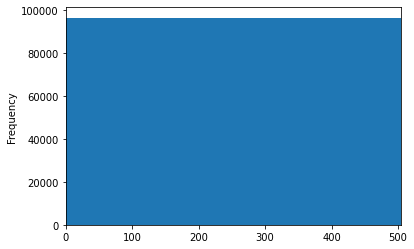

In [106]:
fig, ax = plt.subplots(1, 1)
merged['DURACAO'].plot(kind='hist', ax=ax)
ax.set_xlim([0, 504]) # 504 hours are 7 days

In [108]:
merged['DURACAO'].quantile(0.01)

5.0

Is there a linear relationship between duration and burnt area?

(0.0, 10000.0)

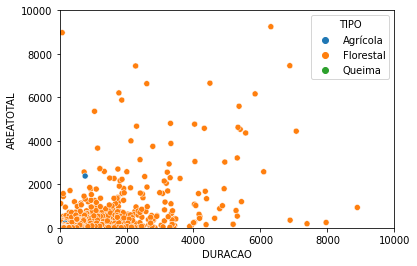

In [122]:
sns.scatterplot(data=merged[['DURACAO', 'AREATOTAL', 'TIPO']], x='DURACAO', y='AREATOTAL', hue='TIPO')
plt.gca().set_xlim([0, 10000])
plt.gca().set_ylim([0, 10000])

It seems there is a lot of low-spread fires and then some that may take quite a while but do not spread a lot (maybe it's related with how much burnable material they have around them). There are also really weird ratios between duration and total area.... 

In [124]:
merged['area_time_ratio'] = merged.apply(lambda x: x['AREATOTAL']/(x['DURACAO']+0.001), axis=1) 

In [126]:
merged['area_time_ratio'].describe()

count    96562.000000
mean         0.022198
std          0.696861
min         -0.003203
25%          0.000333
50%          0.001538
75%          0.007692
max        156.400000
Name: area_time_ratio, dtype: float64

In [130]:
merged[merged['area_time_ratio'] > 100]

,Unnamed: 0,DISTRITO,TIPO,ANO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,QUEIMADA,...,FICHEIROIMAGEM_GNR,AREASFICHEIROSHP_GTF,AREASFICHEIROSHPXML_GTF,AREASFICHEIRODBF_GTF,AREASFICHEIROPRJ_GTF,AREASFICHEIROSBN_GTF,AREASFICHEIROSBX_GTF,AREASFICHEIROSHX_GTF,AREASFICHEIROZIP_SAA,area_time_ratio
6250,6250,Aveiro,Florestal,2017,6470.61,1746.48,756.5400,8973.6300,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.045064
632,632,Portalegre,Agrícola,2021,0.00,0.00,0.1564,0.1564,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.400000


In [132]:
merged[merged['area_time_ratio'] > 100]['DURACAO']

6250    78.0
632      0.0
Name: DURACAO, dtype: float64

So, it seems that it was a really huge and quick-spreading wildfire or one where the duration information was incorrectly saved. **As the area seems OK and we discard the duration information, I don't see a strong need for filtering here.**